In [1]:
import os
import pathlib
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gemmi
import seaborn as sns

## Goal  
distribution of water B factor

In [2]:
# Test on a single PDB file.
structure = gemmi.read_structure("/Users/mingbin/Desktop/Wankowicz_lab_Mac/Projects/water/data/pdb_redo_data/2yp9_final.pdb")

In [18]:
# Information about a residue, see: https://gemmi.readthedocs.io/en/stable/mol.html#residue.

In [3]:
structure = structure
# Check model.
i = 0
model = structure[i]  # consider the first model (skip if empty)
while len(model) == 0:  # sometimes the first model is empty
    i += 1
    try:
        model = structure[i]
    except Exception:
        raise ValueError("Can't read valid model from the input PDB file!")


In [5]:
# Chain.
chain_dict={}
for chain in model:
    print(chain.name)
    water_list=[]
    for res in chain:
        print(res.name)
        print
        if res.name in ["HOH", "WAT"]: # Check if is water.
            water_list.append(res.name)

A
ASN
SER
THR
ALA
THR
LEU
CYS
LEU
GLY
HIS
HIS
ALA
VAL
PRO
ASN
GLY
THR
ILE
VAL
LYS
THR
ILE
THR
ASN
ASP
GLN
ILE
GLU
VAL
THR
ASN
ALA
THR
GLU
LEU
VAL
GLN
SER
SER
SER
THR
GLY
GLY
ILE
CYS
ASP
SER
PRO
HIS
GLN
ILE
LEU
ASP
GLY
GLU
ASN
CYS
THR
LEU
ILE
ASP
ALA
LEU
LEU
GLY
ASP
PRO
GLN
CYS
ASP
GLY
PHE
GLN
ASN
LYS
LYS
TRP
ASP
LEU
PHE
VAL
GLU
ARG
SER
LYS
ALA
TYR
SER
ASN
CYS
TYR
PRO
TYR
ASP
VAL
PRO
ASP
TYR
ALA
SER
LEU
ARG
SER
LEU
VAL
ALA
SER
SER
GLY
THR
LEU
GLU
PHE
ASN
ASN
GLU
SER
PHE
ASN
TRP
THR
GLY
VAL
THR
GLN
ASN
GLY
THR
SER
SER
ALA
CYS
LYS
ARG
LYS
SER
ASN
ASN
SER
PHE
PHE
SER
ARG
LEU
ASN
TRP
LEU
THR
HIS
LEU
LYS
PHE
LYS
TYR
PRO
ALA
LEU
ASN
VAL
THR
MET
PRO
ASN
ASN
GLU
LYS
PHE
ASP
LYS
LEU
TYR
ILE
TRP
GLY
VAL
HIS
HIS
PRO
GLY
THR
ASP
ASN
ASP
GLN
ILE
PHE
LEU
TYR
ALA
GLN
ALA
SER
GLY
ARG
ILE
THR
VAL
SER
THR
LYS
ARG
SER
GLN
GLN
THR
VAL
ILE
PRO
ASN
ILE
GLY
SER
ARG
PRO
ARG
VAL
ARG
ASN
ILE
PRO
SER
ARG
ILE
SER
ILE
TYR
TRP
THR
ILE
VAL
LYS
PRO
GLY
ASP
ILE
LEU
LEU
ILE
ASN
SER
THR
GLY
ASN
LEU
ILE
ALA
PRO
ARG
GLY
TY

In [7]:
print(model[0]) # chain.

<gemmi.Chain A with 1035 res>


Lines in file.     
ATOM      1  N   ASN A   8     -54.578   8.517 -11.220  1.00 61.69           N  
ATOM      2  CA  ASN A   8     -53.242   8.340 -11.853  1.00 58.49           C  
ATOM      3  CB  ASN A   8     -53.269   7.221 -12.888  1.00 63.61           C 

In [11]:
print(model[0][0]) # residue.
res = model[0][0]
print(res.is_water())
print(res.name, res.seqid)

8(ASN)
False
ASN 8


In [12]:
res

<gemmi.Residue 8(ASN) with 8 atoms>

In [103]:
print(res.seqid)

468


In [104]:
str(res.seqid)

'468'

In [13]:
res[0]

<gemmi.Atom N at (-54.6, 8.5, -11.2)>

In [14]:
type(res[0])

gemmi.Atom

In [27]:
res[0].b_iso # B factor. Match the lines in pdb line.

61.689998626708984

In [100]:
res[0].occ

1.0

In [21]:
res[0].b_eq() # B_eq?.

0.0

In [22]:
res[0].aniso # B_eq?.

<gemmi.SMat33f(0, 0, 0, 0, 0, 0)>

In [25]:
chain = model[0]

In [26]:
chain['HOH']

ValueError: Not a seqid: HOH

In [15]:
lookup={x.atom: x for x in model.all()}

In [16]:
lookup

{<gemmi.Atom N at (-54.6, 8.5, -11.2)>: <gemmi.CRA A/ASN 8/N>,
 <gemmi.Atom CA at (-53.2, 8.3, -11.9)>: <gemmi.CRA A/ASN 8/CA>,
 <gemmi.Atom CB at (-53.3, 7.2, -12.9)>: <gemmi.CRA A/ASN 8/CB>,
 <gemmi.Atom CG at (-53.7, 7.7, -14.2)>: <gemmi.CRA A/ASN 8/CG>,
 <gemmi.Atom OD1 at (-54.9, 8.1, -14.4)>: <gemmi.CRA A/ASN 8/OD1>,
 <gemmi.Atom ND2 at (-52.8, 7.6, -15.2)>: <gemmi.CRA A/ASN 8/ND2>,
 <gemmi.Atom C at (-52.8, 9.6, -12.5)>: <gemmi.CRA A/ASN 8/C>,
 <gemmi.Atom O at (-53.6, 10.6, -12.7)>: <gemmi.CRA A/ASN 8/O>,
 <gemmi.Atom N at (-51.5, 9.7, -12.8)>: <gemmi.CRA A/SER 9/N>,
 <gemmi.Atom CA at (-50.8, 11.0, -12.9)>: <gemmi.CRA A/SER 9/CA>,
 <gemmi.Atom CB at (-51.3, 11.8, -14.1)>: <gemmi.CRA A/SER 9/CB>,
 <gemmi.Atom OG at (-52.4, 12.6, -13.8)>: <gemmi.CRA A/SER 9/OG>,
 <gemmi.Atom C at (-50.8, 11.9, -11.7)>: <gemmi.CRA A/SER 9/C>,
 <gemmi.Atom O at (-50.3, 13.0, -11.7)>: <gemmi.CRA A/SER 9/O>,
 <gemmi.Atom N at (-51.4, 11.4, -10.6)>: <gemmi.CRA A/THR 10/N>,
 <gemmi.Atom CA at (-51.3, 

In [29]:
# Training set.
train_list = pd.read_csv("/Users/mingbin/Desktop/Wankowicz_lab_Mac/Projects/water/data/train_split.txt", header=None)
train_list = train_list[0].tolist()
# Test set.
test_list = pd.read_csv("/Users/mingbin/Desktop/Wankowicz_lab_Mac/Projects/water/data/test_split.txt", header=None)
test_list = test_list[0].tolist()

In [30]:
## Collect water residues.
## Loop through all pdb files.
pdb_path = pathlib.Path('/Users/mingbin/Desktop/Wankowicz_lab_Mac/Projects/water/data/pdb_redo_data')
pdbs = list(pdb_path.glob('*_final.pdb')) # Pay attention to the pattern of names. A general "*.pdb" would result in duplicate files when looping.
# Train.
pdb_train = []
for a in pdbs:
    name = a.stem.split('_')[0]
    if name in train_list:
        pdb_train.append(a)
# Test.
pdb_test = []
for a in pdbs:
    name = a.stem.split('_')[0]
    if name in test_list:
        pdb_test.append(a)

In [40]:
# Chain.
chain_dict={}
chain_keys=['seq_id', 'res', 'b_fac']
filter = ['HOH', 'WAT', 'H2O'] 
for chain in model:
    # ind_chain={}
    ind_chain={k: [] for k in chain_keys}
    res_list=[]
    id_list=[]
    b_fac=[]
    for res in chain:
        if res.name in filter: # Check if it is not in any of the filter lists.
            res_list.append(res.name)
            id_list.append(res.seqid)
            b_fac.append(res[0].b_iso) # Only one atom in water residue: O atom.
    # ind_chain.keys() = chain_keys # dictionary keys of each PDB. {'A': []}
    ind_chain['seq_id']=id_list
    ind_chain['res']=res_list
    ind_chain['b_fac']=b_fac
    # For each chain.
    chain_dict[chain.name] = ind_chain

In [105]:
# Create a dictionary of chains and the list of mols of interest for BOTH training and test sets.
data1, data2 = pdb_train, pdb_test
filter = ['HOH', 'WAT', 'H2O'] # List of crystallographic ligands.

keys=['name', 'structure']
chain_keys=['seq_id', 'res', 'b_fac']
wat_train_dict, wat_test_dict = {k: [] for k in keys}, {k: [] for k in keys}
for all_dict, data in zip([wat_train_dict, wat_test_dict], [data1, data2]):
    for a in data: # Loop over all PDB structures.
        name = a.stem.split('_')[0]
        structure = gemmi.read_structure(str(a))
        # Check model.
        i = 0
        model = structure[i]  # consider the first model (skip if empty)
        while len(model) == 0:  # sometimes the first model is empty
            i += 1
            try:
                model = structure[i]
            except Exception:
                raise ValueError("Can't read valid model from the input PDB file!")
        # Chain.
        chain_dict={}
        for chain in model:
            ind_chain={k: [] for k in chain_keys} # seq_id, res, b_fac
            res_list=[]
            id_list=[]
            b_fac=[]
            for res in chain:
                if res.name in filter: # Check if it is not in any of the filter lists.
                    res_list.append(res.name)
                    id_list.append(str(res.seqid))
                    b_fac.append(res[0].b_iso) # Only one atom in water residue: O atom.
            ind_chain['seq_id']=id_list
            ind_chain['res']=res_list
            ind_chain['b_fac']=b_fac
            # For each chain.
            chain_dict[chain.name] = ind_chain
        # Summarize as {chain: list of mols of interest}.
        all_dict['name'].append(name)
        all_dict['structure'].append(chain_dict)

In [106]:
df_wat_train = pd.DataFrame(wat_train_dict)   
df_wat_test = pd.DataFrame(wat_test_dict)

In [66]:
df_wat_test['structure'].values[0].keys()

dict_keys(['A', 'B'])

In [64]:
len(df_wat_test['structure'].values[0])

2

In [76]:
def nested_b_fac(structure_dict):
    pdb_b_fac = []
    for k, v in structure_dict.items(): # k is the chain name. v is the individual chain dictionary, with keys: seq_id, res, b_fac.
        b_fac = v['b_fac']
        pdb_b_fac.append(b_fac)
    return pdb_b_fac

In [107]:
# Apply the function to each row of the dataframe.
for df in [df_wat_train, df_wat_test]:
    df['b_fac'] = None
    # for i, row in df.iterrows():
    #     structure_dict = row['structure']
    #     pdb_b_fac = nested_b_fac(structure_dict) # list of b_factor lists
    #     df.loc[i, 'b_fac'] = pdb_b_fac
    df['b_fac'] = df['structure'].apply(nested_b_fac)

In [108]:
df_wat_train.to_pickle('df_water_4_train.pkl')
df_wat_test.to_pickle('df_water_4_test.pkl')

In [80]:
df_wat_test

,name,structure,b_fac
0,6zw2,"{'A': {'seq_id': [501, 502, 503, 504, 505, 506...","[[16.34000015258789, 35.43000030517578, 22.620..."
1,4hr3,"{'A': {'seq_id': [601, 602, 603, 604, 605, 606...","[[10.6899995803833, 12.539999961853027, 6.25, ..."
2,6yp2,"{'A': {'seq_id': [401, 402, 403, 404, 405, 406...","[[16.559999465942383, 38.38999938964844, 16.95..."
3,5pbi,"{'A': {'seq_id': [2102, 2103, 2105, 2106, 2107...","[[49.689998626708984, 58.25, 37.91999816894531..."
4,7f5c,"{'A': {'seq_id': [301, 304, 305, 307, 308, 309...","[[21.549999237060547, 26.200000762939453, 36.4..."
...,...,...,...
1288,3vha,"{'A': {'seq_id': [2, 3, 4, 5, 6, 7, 238, 239, ...","[[13.020000457763672, 11.199999809265137, 13.8..."
1289,4xua,"{'A': {'seq_id': [2101, 2103, 2104, 2105, 2106...","[[48.47999954223633, 44.310001373291016, 38.40..."
1290,7o5s,"{'A': {'seq_id': [401, 403, 404, 405, 406, 407...","[[31.559999465942383, 18.920000076293945, 33.5..."
1291,6agy,"{'A': {'seq_id': [201, 202, 203, 204, 205, 206...","[[27.219999313354492, 38.56999969482422, 35.86..."


In [109]:
df_wat_test.iloc[0:3]

,name,structure,b_fac
0,6zw2,"{'A': {'seq_id': ['501', '502', '503', '504', ...","[[16.34000015258789, 35.43000030517578, 22.620..."
1,4hr3,"{'A': {'seq_id': ['601', '602', '603', '604', ...","[[10.6899995803833, 12.539999961853027, 6.25, ..."
2,6yp2,"{'A': {'seq_id': ['401', '402', '403', '404', ...","[[16.559999465942383, 38.38999938964844, 16.95..."


In [91]:
print(len(nested)) # all PDB.
print(len(nested[0])) # all chains on one PDB.
print(len(nested[0][0])) # all water residues on on chain.


4507
1
336


In [90]:
nested[0][0]

[43.75,
 60.560001373291016,
 36.29999923706055,
 50.459999084472656,
 27.81999969482422,
 27.729999542236328,
 31.489999771118164,
 35.970001220703125,
 39.060001373291016,
 44.790000915527344,
 32.83000183105469,
 32.77000045776367,
 37.939998626708984,
 27.549999237060547,
 31.8799991607666,
 42.61000061035156,
 33.880001068115234,
 26.68000030517578,
 25.299999237060547,
 54.18000030517578,
 31.959999084472656,
 16.989999771118164,
 23.489999771118164,
 16.280000686645508,
 16.559999465942383,
 23.149999618530273,
 18.15999984741211,
 25.260000228881836,
 18.65999984741211,
 20.549999237060547,
 44.4900016784668,
 19.329999923706055,
 37.619998931884766,
 65.05000305175781,
 38.349998474121094,
 55.81999969482422,
 59.369998931884766,
 32.380001068115234,
 52.31999969482422,
 33.29999923706055,
 37.4900016784668,
 27.81999969482422,
 31.290000915527344,
 22.959999084472656,
 33.72999954223633,
 45.459999084472656,
 40.86000061035156,
 24.790000915527344,
 63.84000015258789,
 35.479

1489982


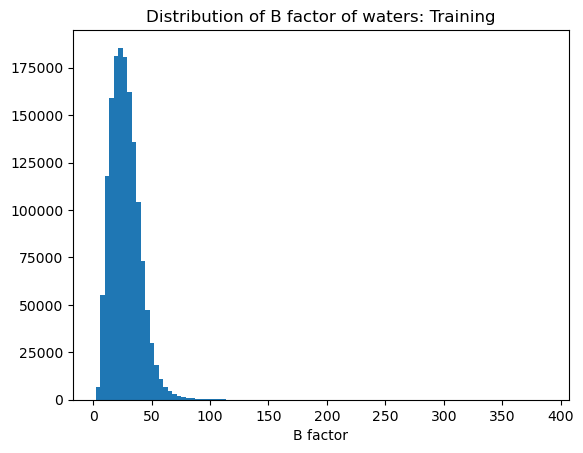

In [95]:
# Plot. Training set.
nested = df_wat_train['b_fac'].values
flat=[water for structure in nested for chain in structure for water in chain]
print(len(flat))
plt.hist(flat, bins=100)
plt.xlabel("B factor")
# plt.ylabel("Number of molecules")
plt.title("Distribution of B factor of waters: Training")
plt.savefig("figures/4_water_Bfac_train.png", dpi=200)
plt.show()

412396


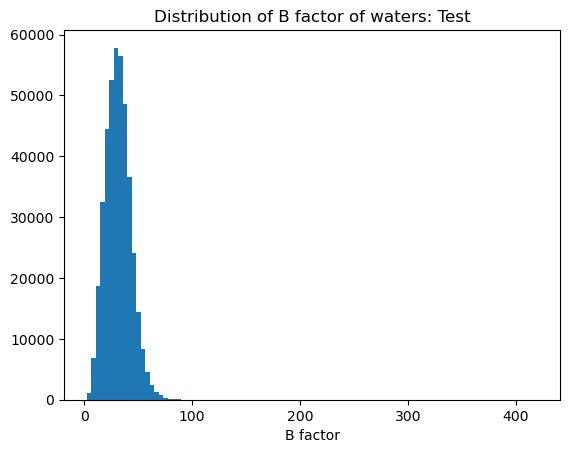

In [96]:
# Plot. Test set.
nested = df_wat_test['b_fac'].values
flat=[water for structure in nested for chain in structure for water in chain]
print(len(flat))
plt.hist(flat, bins=100)
plt.xlabel("B factor")
# plt.ylabel("Number of molecules")
plt.title("Distribution of B factor of waters: Test")
plt.savefig("figures/4_water_Bfac_test.png", dpi=200)
plt.show()

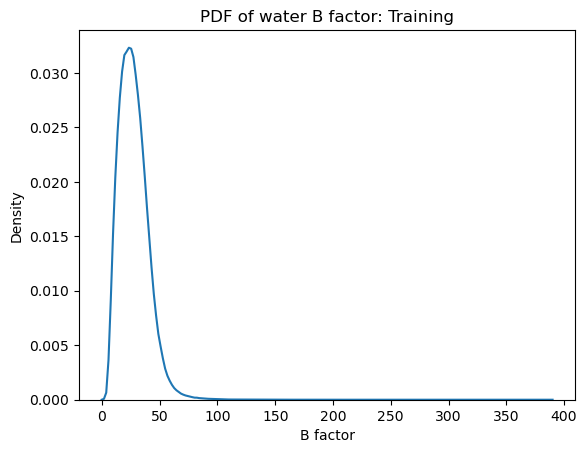

In [97]:
# PDF plot.
nested = df_wat_train['b_fac'].values
flat=[water for structure in nested for chain in structure for water in chain]
df = pd.DataFrame(flat, columns=['B factor'])
sns.kdeplot(df, x='B factor')
# sns.histplot(df, x='Number of residues')
# plt.xlabel("Number of residues")
# plt.ylabel("Number of chains")
plt.title("PDF of water B factor: Training")
plt.savefig("figures/4_PDF_water_train.png", dpi=200)
plt.show()

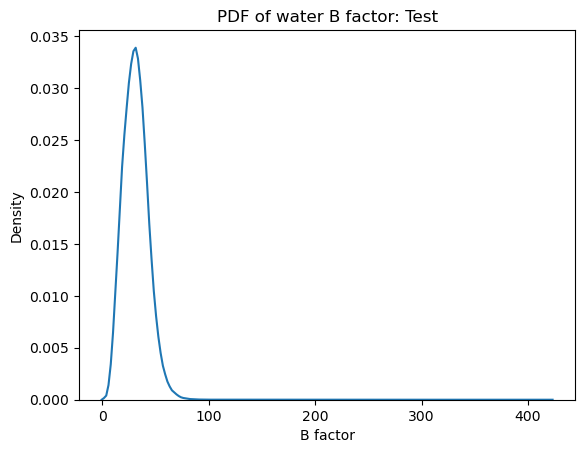

In [98]:
# PDF plot. Test set.
nested = df_wat_test['b_fac'].values
flat=[water for structure in nested for chain in structure for water in chain]
df = pd.DataFrame(flat, columns=['B factor'])
sns.kdeplot(df, x='B factor')
# sns.histplot(df, x='Number of residues')
# plt.xlabel("Number of residues")
# plt.ylabel("Number of chains")
plt.title("PDF of water B factor: Test")
plt.savefig("figures/4_PDF_water_test.png", dpi=200)
plt.show()

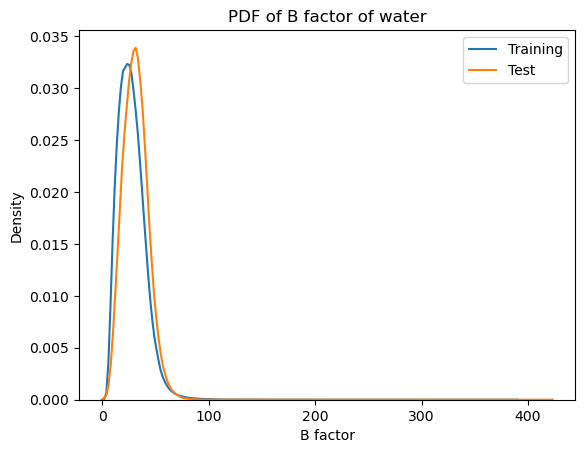

In [99]:
# Plots. 
x_label = 'B factor'
nested = df_wat_train['b_fac'].values
flat=[water for structure in nested for chain in structure for water in chain]
nested2 = df_wat_test['b_fac'].values
flat2=[water for structure in nested2 for chain in structure for water in chain]
df = pd.DataFrame(flat, columns=[x_label])
df2 = pd.DataFrame(flat2, columns=[x_label])
sns.kdeplot(df, x=x_label, label='Training')
sns.kdeplot(df2, x=x_label, label='Test')
plt.title("PDF of B factor of water")
plt.legend()
plt.savefig("figures/4_PDF_Both_water_B.png", dpi=200)
plt.show()

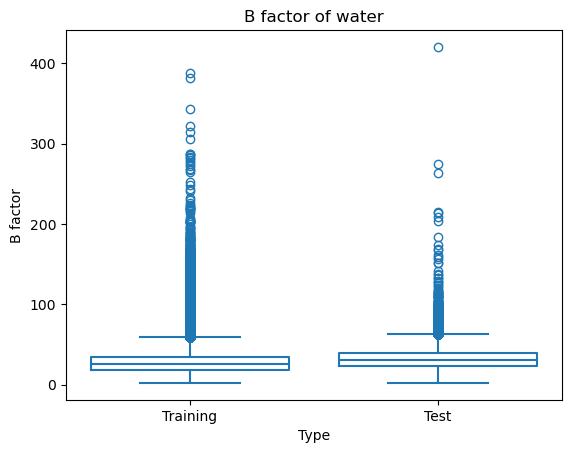

In [121]:
# Box plot.
x_label = 'B factor'
nested = df_wat_train['b_fac'].values
flat=[water for structure in nested for chain in structure for water in chain]
nested2 = df_wat_test['b_fac'].values
flat2=[water for structure in nested2 for chain in structure for water in chain]

# Generate data df.
df = pd.DataFrame({x_label: flat, 'Type': ['Training']*len(flat)})
df2 = pd.DataFrame({x_label: flat2, 'Type': ['Test']*len(flat2)})
df_both = pd.concat([df, df2], ignore_index=True)

sns.boxplot(data=df_both, x='Type', y=x_label, fill=False)
plt.title("B factor of water")
# plt.legend()
plt.savefig("figures/4_Box_Both_water_B.png", dpi=200)
plt.show()

In [115]:
example_df = sns.load_dataset("titanic")
example_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
